<a href="https://colab.research.google.com/github/JorgeCastroM/AABD_SQL/blob/master/Redneuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Cargar el archivo CSV desde sample_data
df = pd.read_csv("sample_data/mnist_train_small.csv")

# Ver las primeras filas
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


¿Cuántos datos tenemos y cuántas variables?

In [3]:
mnist  = df
print("Shape of the dataset:", mnist.shape)

Shape of the dataset: (19999, 785)


En el MNIST, la primera variable es la clasificación de a qué número se corresponde ese dato. Vamos a separar esa variable respuesta de las demás variables.

In [4]:
# Guardamos la X y la respuesta Y
X = mnist.iloc[:, 1:]
Y = mnist.iloc[:, 0]

¿Cuántas variables tenemos ahora sin contar la respuesta?

In [5]:
X.shape

(19999, 784)

¿Por qué hay 784 variables?

In [7]:
import numpy as np
np.sqrt(784)

np.float64(28.0)

¿Qué medidas numéricas podemos obtener para describir los datos?

In [8]:

X.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
count,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215011,0.087704,0.036502,0.013651,0.032602,0.006000,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314821,3.921664,2.712527,0.950818,2.718102,0.600333,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,79.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


<Axes: ylabel='count'>

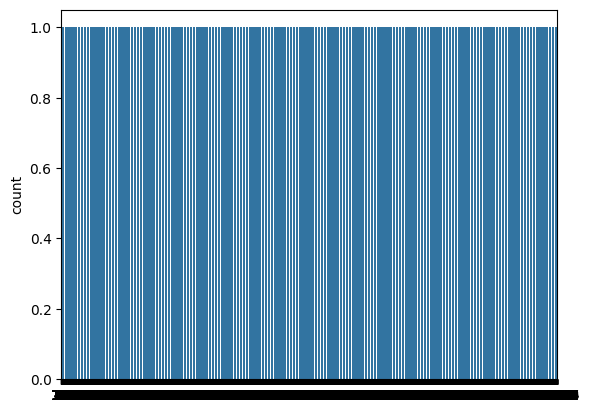

In [10]:
import seaborn as sns
# ¿Estan las clases balanceadas?
sns.countplot(Y)

¿Cómo podríamos ver una observación (una fila en nuestro dataset) de forma que se vea la imagen del número?

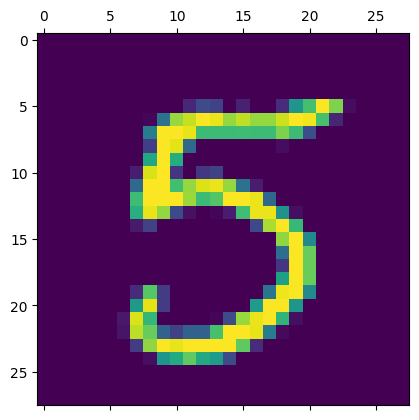

In [13]:
import matplotlib.pyplot as plt
plt.matshow(X.iloc[0,:].values.reshape(28,28))

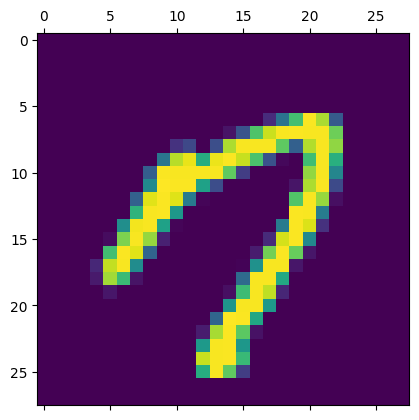

In [14]:
plt.matshow(X.iloc[1,:].values.reshape(28,28))

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


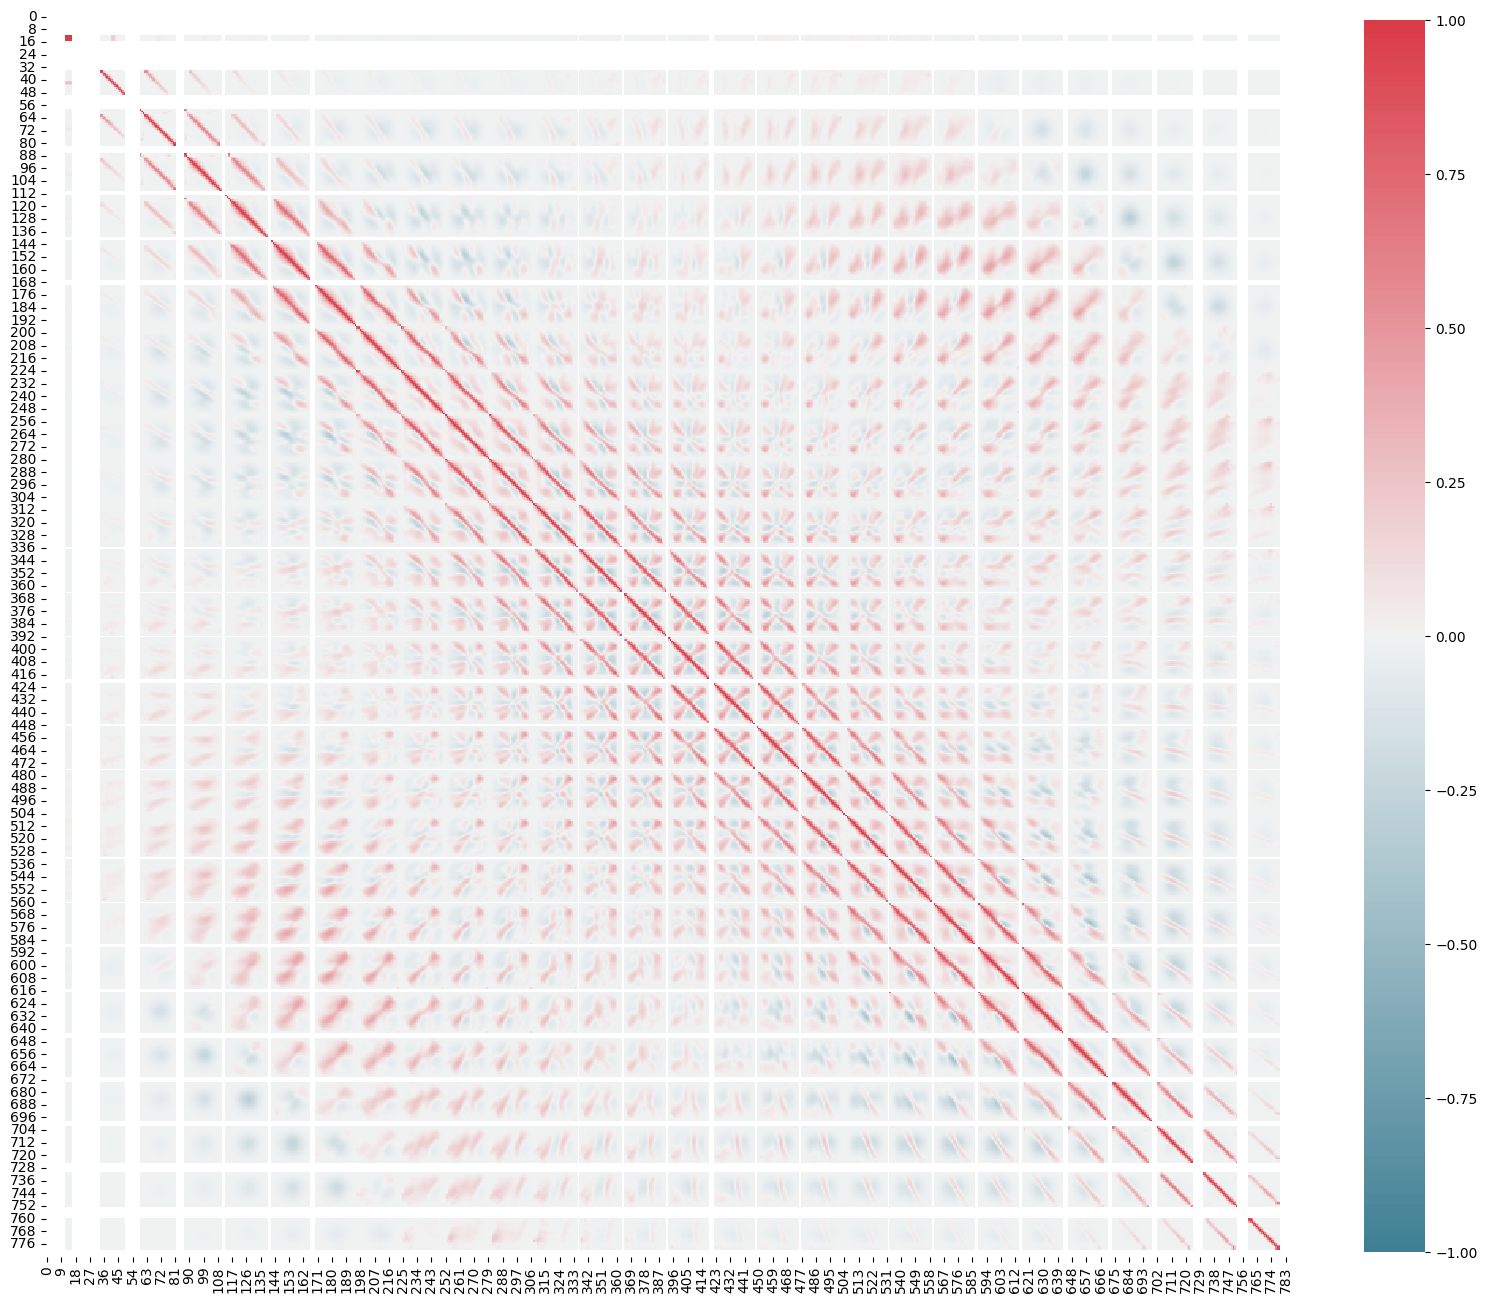

In [15]:
# Correlaciones
corrmat=np.corrcoef(X.T)
plt.show()
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(corrmat,vmin=-1, vmax=1,center=0,square=True,cmap=cmap,cbar_kws={"shrink": .8})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


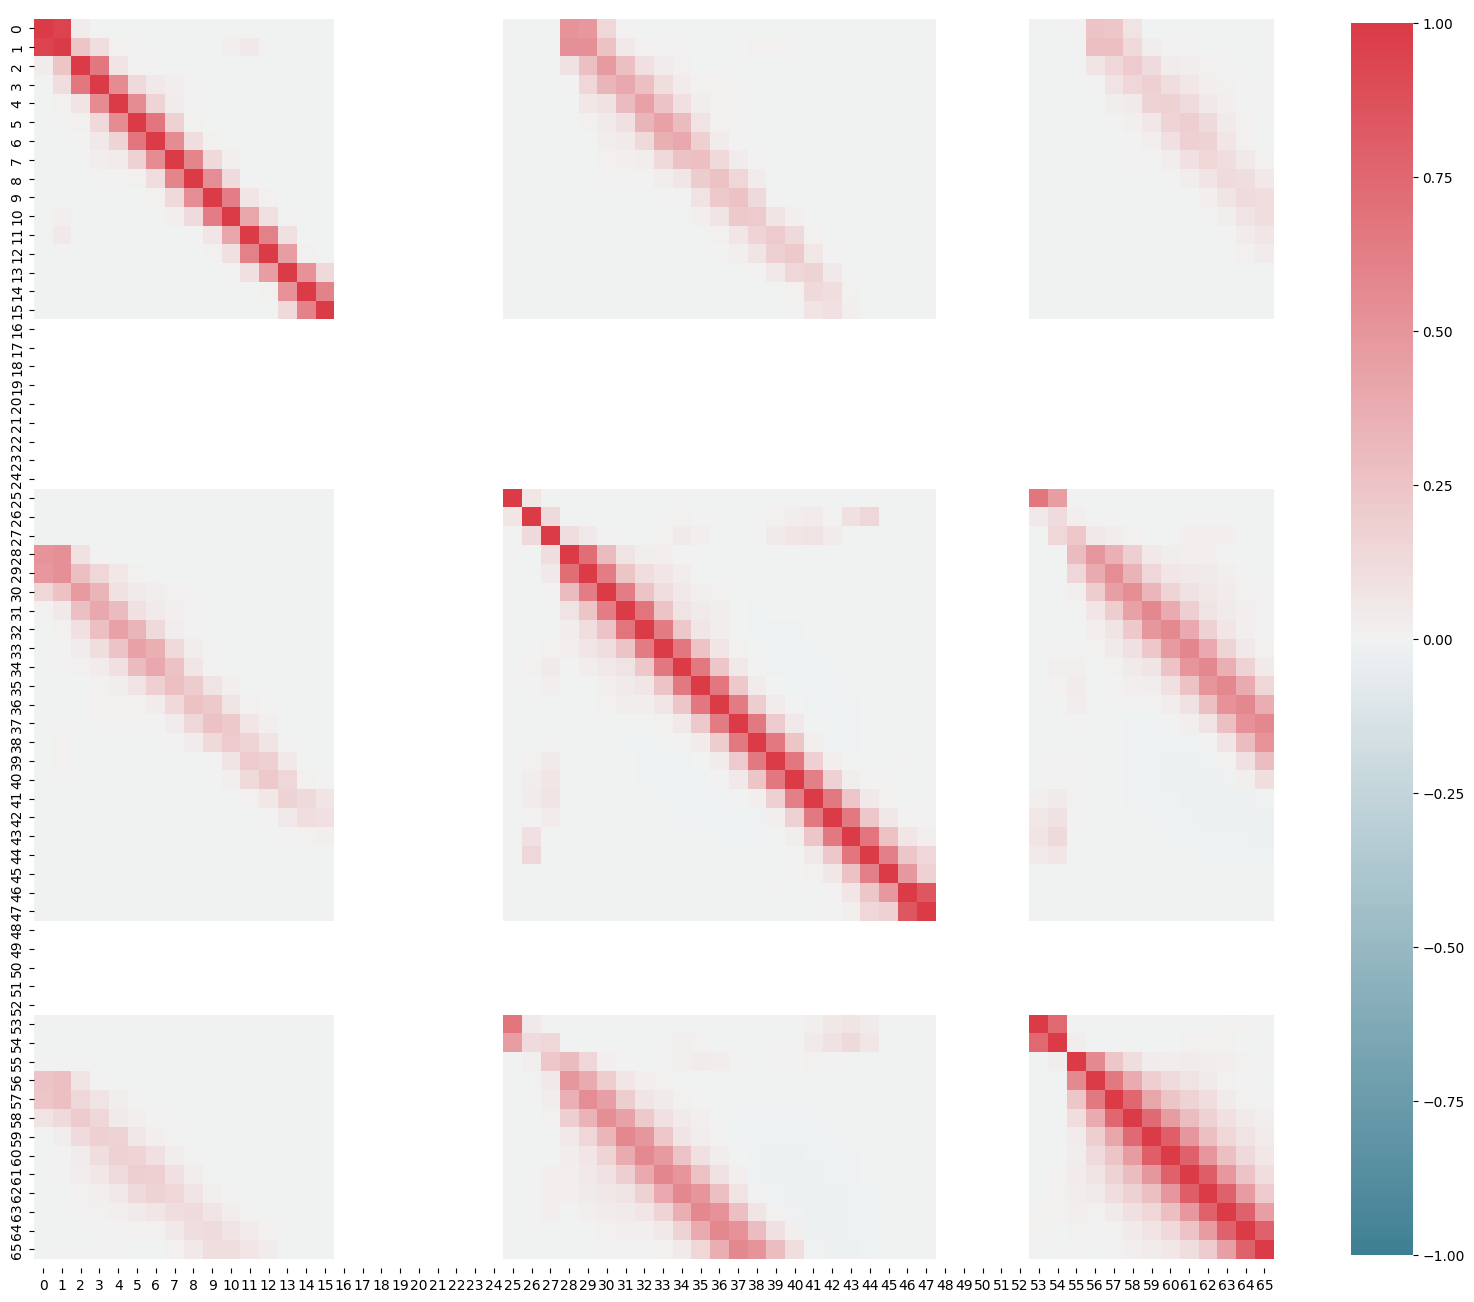

In [16]:
# Zoom de la estructura de la matriz de correlaciones
corrmat2=np.corrcoef(X.iloc[:,34:100].values.T)
plt.show()
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corrmat2,vmin=-1, vmax=1,center=0,square=True,cmap=cmap,cbar_kws={"shrink": .8})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()